# Final Project - DDSM

By:

### Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Phase 0 - Preliminaries

First, before we start to talk about the project, the most important thing we must do is study the DB as we need to understand what we're going to be exploring and in order for us to do that on the best side we must understand the subject and more specificlly the DB.

Let's import the CSV part of the dataset, we notice that our data is divided into 6 differnt tables, we'll import all of them (giving them different names) and will be exploring them one by one.

In [53]:
dicom = pd.read_csv('C:/Users/Maya/DDSM_CSV/dicom_info.csv', sep=',')

In [54]:
dicom

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.62798...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...,NaN,8,8,BREAST,3744,20160503,134238.422,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.627982547125586065005...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.310901637111684385906...,91038.0
10233,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.82451...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.824512...,NaN,16,16,BREAST,3316,20160426,123905.617,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.824512568105677732346...,1,0,ISO_IR 100,20161004.0,DDSM,1.3.6.1.4.1.9590.100.1.2.246896536912401556922...,132704.0
10234,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24759...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247594...,NaN,16,16,BREAST,2712,20160426,134551.632,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.247594800112988856209...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.150339554012064216510...,191922.0
10235,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...,NaN,8,8,BREAST,2736,20160426,110906.969,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.285138900913160236325...,1,0,ISO_IR 100,20160721.0,DDSM,1.3.6.1.4.1.9590.100.1.2.426769868613284096628...,83526.0


This table consists of 38 columns, 10237 attributes. Our aim is to extract the important details and understand what we're seeing here. In the info part we can see that some of the columns are empty therefore we can disregard them.

In [55]:
dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [56]:
column_names = dicom.columns
print(column_names)

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')


In [57]:
dicom = dicom.dropna(axis=1, how='all') # NaN
dicom = dicom.drop(columns=['ConversionType']) # consists of only one value therefore irrelevant


dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   BitsAllocated                                10237 non-null  int64  
 3   BitsStored                                   10237 non-null  int64  
 4   BodyPartExamined                             10237 non-null  object 
 5   Columns                                      10237 non-null  int64  
 6   ContentDate                                  10237 non-null  int64  
 7   ContentTime                                  10237 non-null  float64
 8   HighBit                                      10237 non-null  int64  
 9   InstanceNumber                               10237 non-null  int64  
 10

After having cleaned our data we'd like to see how it is distributed

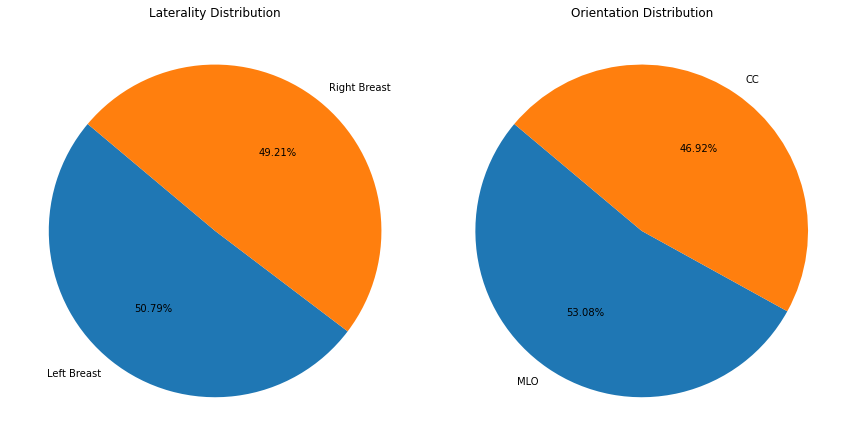

In [67]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
((ax1, ax2)) = ax

# Subplot 1: Laterality Distribution
laterality_counts = dicom['Laterality'].value_counts()
count_L = laterality_counts.get('L', 0)
count_R = laterality_counts.get('R', 0)

ax1.pie([count_L, count_R], labels=['Left Breast', 'Right Breast'], autopct='%1.2f%%', startangle=140)
ax1.set_title('Laterality Distribution')

# Subplot 2: Orientation Distribution
orientation_counts = dicom['PatientOrientation'].value_counts()
count_MLO = orientation_counts.get('MLO', 0)
count_CC = orientation_counts.get('CC', 0)

ax2.pie([count_MLO, count_CC], labels=['MLO', 'CC'], autopct='%1.2f%%', startangle=140)
ax2.set_title('Orientation Distribution')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Looking at the mass table

In [74]:
mass = pd.read_csv('C:/Users/Maya/DDSM_CSV/mass_case_description_train_set.csv', sep=',')
mass

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [75]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

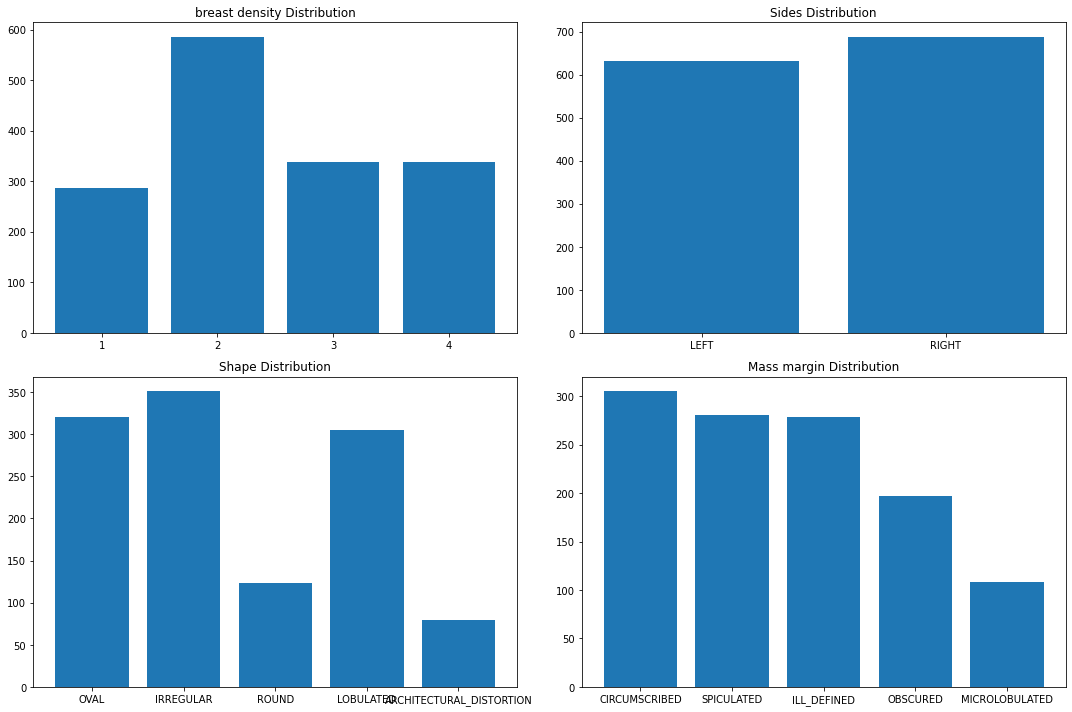

In [101]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
((ax1, ax2), (ax3, ax4)) = ax

# Subplot 1: Density Distribution
density_counts = mass['breast_density'].value_counts()
count_1 = density_counts.get(1, 0)
count_2 = density_counts.get(2, 0)
count_3 = density_counts.get(3, 0)
count_4 = density_counts.get(4, 0)

density_labels = ['1', '2', '3', '4']
density_counts = [count_1, count_2, count_3, count_3]

ax1.bar(density_labels, density_counts)
ax1.set_title('breast density Distribution')

# Subplot 2: Sides Distribution
sides_count = mass['left or right breast'].value_counts()
count_left = sides_count.get('LEFT', 0)
count_right = sides_count.get('RIGHT', 0)

sides_labels = ['LEFT', 'RIGHT']
sides_count = [count_left, count_right]

ax2.bar(orientation_labels, orientation_counts)
ax2.set_title('Sides Distribution')


# Subplot 3: Shape Distribution   
mass_shape_count = mass['mass shape'].value_counts()
count_oval = mass_shape_count.get('OVAL', 0)
count_irregular = mass_shape_count.get('IRREGULAR', 0)
count_round = mass_shape_count.get('ROUND', 0)
count_lobulated = mass_shape_count.get('LOBULATED', 0)
count_ad = mass_shape_count.get('ARCHITECTURAL_DISTORTION', 0)

shape_labels = ['OVAL', 'IRREGULAR', 'ROUND', 'LOBULATED', 'ARCHITECTURAL_DISTORTION']
shape_count = [count_oval, count_irregular, count_round, count_lobulated, count_ad]

ax3.bar(shape_labels, shape_count)
ax3.set_title('Shape Distribution')

# Subplot 4: Density Distribution   
mass_shape_count = mass['mass margins'].value_counts()
count_c = mass_shape_count.get('CIRCUMSCRIBED', 0)
count_s = mass_shape_count.get('SPICULATED', 0)
count_illdef = mass_shape_count.get('ILL_DEFINED', 0)
count_obscured = mass_shape_count.get('OBSCURED', 0)
count_m = mass_shape_count.get('MICROLOBULATED', 0)

shape_labels = ['CIRCUMSCRIBED', 'SPICULATED', 'ILL_DEFINED', 'OBSCURED', 'MICROLOBULATED']
shape_count = [count_c, count_s, count_illdef, count_obscured, count_m]

ax4.bar(shape_labels, shape_count)
ax4.set_title('Mass margin Distribution')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()
